# Analysis of $N_2$ in a static electric field

We consider a $N_2$ molecule in a static electric field. We present results for fields both directed in the z (axial) and in the x directions. 

The main aim of this analysis is to determine the minimum dimension allowed of the simulation box as a function of the field intensity. As a criterium of consistency we require that the energy of the occupied KS orbitals should remain constant as the dimension of the box is increased.  

In [3]:
%autosave 0
from BigDFT import Logfiles as lf
from BigDFT import Calculators as C
from futile import Yaml
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../../')
import Routine as R
outputpath = 'static-field/'

Autosave disabled


First of all we define the python dictionary that contains the basic keys common to all the file in the run and we write these common variables in the default file

In [4]:
inp0 = {'dft' : 
        {'hgrids': 0.4,
         'gnrm_cv' : 1e-8,
         'itermax' : 100},
        'posinp': 'N2_posinp.xyz'}
Yaml.dump(inp0,outputpath + 'default.yaml')

We perform the analysis for different values of the field norm and different boz sizes

## Generation of the input files

In [5]:
enorm = [[0.0,str('0_')],[1e-4,str('1em4_')], [1e-3,str('1em3_')],[1e-2,str('1em2_')], [5e-2,str('5em2_')], [1e-1,str('1em1_')]]
rmult = [float(i) for i in range(4,10)]

We generate the input files and the run files (one for each value of the field norm)

In [6]:
for e in enorm:
    ez=[0.0,0.0,e[0]]
    ex=[e[0],0.0,0.0]
    inpEz={'dft':{'elecfield': ez}}
    inpEx={'dft':{'elecfield': ex}}
    lrun=[]
    for r in rmult:
        inpEz['dft']['rmult'] = [r, 9.0]
        inpEx['dft']['rmult'] = [r, 9.0]
        inpnameEz = 'Ez_'+e[1]+str('rmult_')+str(r)
        inpnameEx = 'Ex_'+e[1]+str('rmult_')+str(r)
        Yaml.dump(inpEz,outputpath + inpnameEz + '.yaml')
        Yaml.dump(inpEx,outputpath + inpnameEx + '.yaml')
        lrun.append(inpnameEz)
        lrun.append(inpnameEx)
    Yaml.dump(lrun,outputpath+'runs_'+e[1])

## Execution of the input files

In [7]:
code=C.SystemCalculator(omp=2,mpi=4)
%cd $outputpath
for e in enorm:
    code.run(run_name='runs_'+e[1],skip=True,outdir='./log/')
%cd ../

/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/free-bc/static-field
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_0_ -d ./log/ -s Yes
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_1em4_ -d ./log/ -s Yes
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_1em3_ -d ./log/ -s Yes
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_1em2_ -d ./log/ -s Yes
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_5em2_ -d ./log/ -s Yes
Executing command:  mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_1em1_ -d ./log/ -s Yes
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/free-bc


## Data Analysis

We discuss the results of these computations. In particular we analyze the scaling of the energy of the occupied orbitals for each value of the field and we check the if the choosen value of the field belong the regime of linear response.

We read all the log files and organize them in two lists (one for Ex and one for Ez) sorted according to the field norm

In [8]:
ExLog = []
EzLog = []
%cd $outputpath
for e in enorm:
    spath = 'log/'+str('log-Ex_')+e[1]+str('*') 
    logsEx = !ls $spath
    #print logsEx
    ExLog.append([lf.Logfile(l) for l in logsEx])
for e in enorm:
    spath = 'log/'+str('log-Ez_')+e[1]+str('*') 
    logsEz = !ls $spath
    #print logsEz
    EzLog.append([lf.Logfile(l) for l in logsEz])
%cd ..

/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/free-bc/static-field
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/free-bc


In [9]:
# The first index select the field, the second the box. For instance:
print ExLog[3][0].log['dft']['elecfield']
print ExLog[0][5].log['dft']['rmult']
print ExLog[0][2].evals[0][0] #give the energy of the orbitals

[0.01, 0.0, 0.0]
[9.0, 9.0]
[-1.03245232 -0.49756407 -0.43140076 -0.43140074 -0.38191704]


We define some useful parameters

In [10]:
numField = len(ExLog)
numBox = len(ExLog[0])
numOrb = len(ExLog[0][0].evals[0][0])
print 'numField',numField
print 'numBox', numBox
print 'numOrb', numOrb

numField 6
numBox 6
numOrb 5


### Energy scaling of the occupied orbitals vs. the simulation box

We chose a value of the field norm

In [11]:
eind = 3
print 'Field norm = ' + enorm[eind][1]

Field norm = 1em2_


Plot the energy of each orbitals in function of the size of the box (z dimension) (for both directions of the field)

Ex [0.01, 0.0, 0.0]
Ez [0.0, 0.0, 0.01]


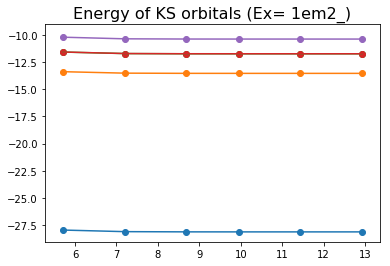

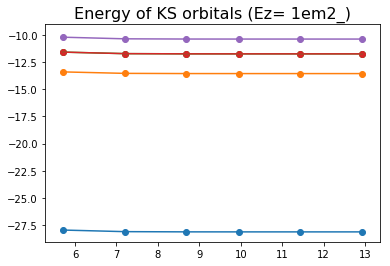

In [12]:
print  'Ex',ExLog[eind][0].log['dft']['elecfield']
enOrbEx=[]
for orb in range(numOrb):
    eorb=[]
    for box in range(numBox):
        eorb.append(27.211*ExLog[eind][box].evals[0][0][orb])
    enOrbEx.append(eorb)
print  'Ez',EzLog[eind][0].log['dft']['elecfield']
enOrbEz=[]
for orb in range(numOrb):
    eorb=[]
    for box in range(numBox):
        eorb.append(27.211*EzLog[eind][box].evals[0][0][orb])
    enOrbEz.append(eorb)
    
dimBox=[]
for box in range(numBox):
    dimBox.append(ExLog[eind][box].log['Sizes of the simulation domain']['Angstroem'][0])

for orb in range(numOrb):
    plt.plot(dimBox,enOrbEx[orb])
    plt.scatter(dimBox,enOrbEx[orb])
    title = 'Energy of KS orbitals (Ex= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.show()

for orb in range(numOrb):
    plt.plot(dimBox,enOrbEz[orb])
    plt. scatter(dimBox,enOrbEz[orb])
    title = 'Energy of KS orbitals (Ez= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.show()

We have verified that enorm = 1e-2 is the highest value that ensures the convergence of the energy of the orbitals

We evalute the variation of the energy of the orbitals due to the field with norm 1e-2, with respect to the case without the field

In [13]:
box = 3
eind = 3
print 'rmult = ', ExLog[0][box].log['dft']['rmult']
print 'Ex = ', ExLog[eind][box].log['dft']['elecfield']
print 'Delta Energy = ', 27.211*(ExLog[eind][box].evals[0][0] - ExLog[0][box].evals[0][0]) 

print 'Ez = ', EzLog[eind][box].log['dft']['elecfield']
print 'Delta Energy = ', 27.211*(EzLog[eind][box].evals[0][0] - EzLog[0][box].evals[0][0]) 

rmult =  [7.0, 9.0]
Ex =  [0.01, 0.0, 0.0]
Delta Energy =  [-0.00826734 -0.00794645 -0.01174396 -0.00756088 -0.00446782]
Ez =  [0.0, 0.0, 0.01]
Delta Energy =  [-0.0109137  -0.02252177 -0.0102691  -0.01026894  0.00279676]


Now we perform some plots that aim to extablish a criterium for choosing the optimum value of the simulation box.

First of all we plot the difference between the energy of each orbital and its value for the greatest simulation box

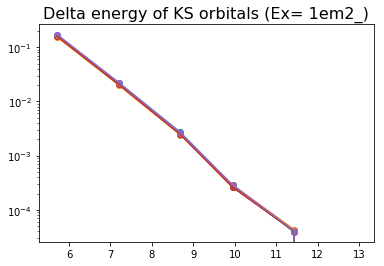

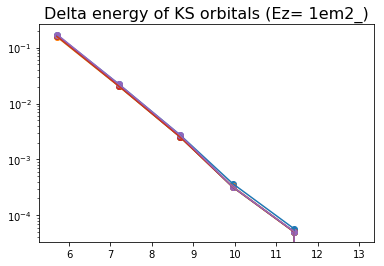

In [14]:
deltaEx=[]
deltaEz=[]
for orb in range(numOrb):
    delta = enOrbEx[orb]-enOrbEx[orb][-1]
    deltaEx.append(delta)
    delta = enOrbEz[orb]-enOrbEz[orb][-1]
    deltaEz.append(delta)

for orb in range(numOrb):
    plt.plot(dimBox,deltaEx[orb])
    plt.scatter(dimBox,deltaEx[orb])
    title = 'Delta energy of KS orbitals (Ex= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.yscale('log')
plt.show()

for orb in range(numOrb):
    plt.plot(dimBox,deltaEz[orb])
    plt.scatter(dimBox,deltaEz[orb])
    title = 'Delta energy of KS orbitals (Ez= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.yscale('log')
plt.show()

We observe that the discrepance of the energy of the orbitals for rmult = 7 is about 2e-3 eV with respect to the (reference) result obtained for rmult = 9

We also plot the (module of the) difference between the energy of each orbital and its value in the box immeadetly lower.

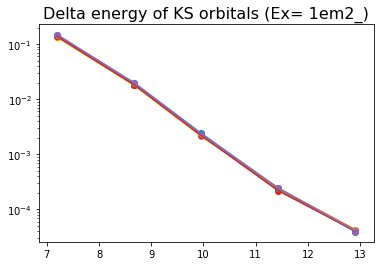

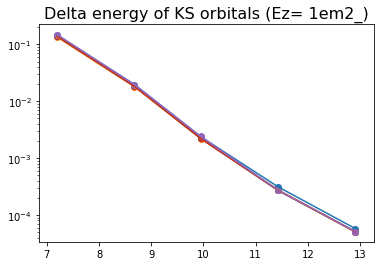

In [15]:
deltaEx=[]
deltaEz=[]
for orb in range(numOrb):
    dx = []
    dz = []
    for i in range(numBox-1):
        dx.append(np.abs(enOrbEx[orb][i+1]-enOrbEx[orb][i]))
        dz.append(np.abs(enOrbEz[orb][i+1]-enOrbEz[orb][i]))
    deltaEx.append(dx)
    deltaEz.append(dz)

dimBoxCut = [dimBox[i] for i in range(1,numBox)]

for orb in range(numOrb):
    plt.plot(dimBoxCut,deltaEx[orb])
    plt.scatter(dimBoxCut,deltaEx[orb])
title = 'Delta energy of KS orbitals (Ex= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.yscale('log')
plt.show()

for orb in range(numOrb):
    plt.plot(dimBoxCut,deltaEz[orb])
    plt.scatter(dimBoxCut,deltaEz[orb])
    title = 'Delta energy of KS orbitals (Ez= '+ enorm[eind][1]+str(')')
plt.title(title,fontsize=16)
plt.yscale('log')
plt.show()

These plots evidence that the scaling of the energy with the size of the box reduce exponentially

### Computation of the static polarizability

We build the following lists, with the values of the x and z components of the induced dipole moments of the fields. We use these values to check the linearity of the dipole moments with respect to the field

In [18]:
box = 3
eMax = 3
print 'rmult= ', ExLog[0][box].log['dft']['rmult'][0]
print 'Field norm = ' + enorm[eMax][1]

rmult=  7.0
Field norm = 1em2_


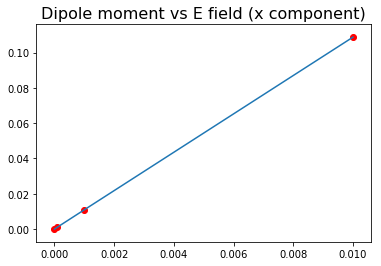

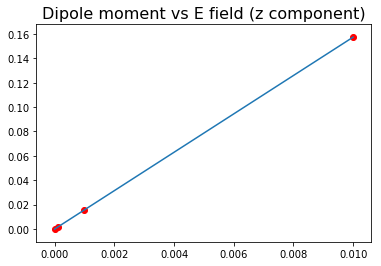

alphaZ =  15.7389002126
interceptZ =  -1.84003399209e-05
alphaX =  10.8701262794
interceptX =  8.37004980237e-06


In [21]:
dipoleX=[]
dipoleZ=[]
eFieldX=[]
eFieldZ=[]
for i in range(eMax+1):
    dipoleX.append(ExLog[i][box].log['Electric Dipole Moment (AU)']['P vector'][0])
    dipoleZ.append(EzLog[i][box].log['Electric Dipole Moment (AU)']['P vector'][2])
    eFieldX.append(enorm[i][0])
    eFieldZ.append(enorm[i][0])
    
# compute the induced dipole by subtracting the value of the dipole at zero field
indDipoleX=[dipoleX[i]-dipoleX[0] for i in range(len(dipoleX))]
indDipoleZ=[dipoleZ[i]-dipoleZ[0] for i in range(len(dipoleZ))]

plt.plot(eFieldX,indDipoleX)
plt.scatter(eFieldX,indDipoleX, color='r')
plt.title('Dipole moment vs E field (x component)',fontsize=16)
plt.show()

plt.plot(eFieldZ,indDipoleZ)
plt.scatter(eFieldZ,indDipoleZ, color='r')
plt.title('Dipole moment vs E field (z component)',fontsize=16)
plt.show()

from scipy import stats
alpha, intercept, r_value, p_value, std_err = stats.linregress(eFieldZ,indDipoleZ)
print 'alphaZ = ', alpha
print 'interceptZ = ', intercept

alpha, intercept, r_value, p_value, std_err = stats.linregress(eFieldX,indDipoleX)
print 'alphaX = ', alpha
print 'interceptX = ', intercept


### Write the occupied orbitals on disk

As a final task of this nb we compute the KS orbitals of the ground state for the field norm equal to $1e-2$, which is the highest computed value of the field for which the linear response regime has been confirmed. We perform the computation for rmult equal to 7 and 9.
We reduce the value of gnrm_cv to 1e-8 to have a more precise reference result.

In [100]:
eind = 2
ez=[0.0,0.0,enorm[eind][0]]
ex=[enorm[eind][0],0.0,0.0]
inpEz={'dft':
       {'elecfield': ez, 
        'gnrm_cv' : 1e-8},
       'output': {'orbitals' : 'binary'}}
inpEx={'dft':
       {'elecfield': ex, 
        'gnrm_cv' : 1e-8},
       'output': {'orbitals' : 'binary'}}
lrun=[]
for r in [7.0,9.0]:
    inpEz['dft']['rmult'] = [r, 9.0]
    inpEx['dft']['rmult'] = [r, 9.0]
    inpEz['radical'] = 'Ez_'+enorm[eind][1]+'rmult_'+str(r)
    inpEx['radical'] = 'Ex_'+enorm[eind][1]+'rmult_'+str(r)
    inpnameEz = 'Ez_wf_'+enorm[eind][1]+str('rmult_')+str(r)
    inpnameEx = 'Ex_wf_'+enorm[eind][1]+str('rmult_')+str(r)
    Yaml.dump(inpEz,outputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,outputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,outputpath+'runs_wf')

We execute the input files

In [101]:
%cd $outputpath
code.run(run_name='runs_wf',skip=True,outdir='./log/')
%cd ../

/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/static-field
Executing command:  OMP_NUM_THREADS=2 mpirun -np 4 $BIGDFT_ROOT/bigdft -r runs_wf -d ./log/ -s Yes
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2
